Implémentation 

Implémentation LGBM without ACP: scaling n'est pas nécessaire dans ce cas 

In [0]:
# corrélation entre les varaibles aprés ACp 
#train_data = pd.DataFrame(X_train_ACP)
#C_mat = train_data.corr()
#fig = plt.figure(figsize = (15,15))
#sb.heatmap(C_mat, vmax = .8, square = True)
#plt.show()

In [0]:
from lightgbm import LGBMClassifier


In [0]:
rf = LGBMClassifier()
rf.fit(X_train_knn,y_train_knn, eval_metric=["error", "logloss","auc"], eval_set=[(X_train_knn, y_train_knn), (X_test_knn, y_test_knn)], verbose=0)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score


In [0]:
predict_test=rf.predict(X_test_knn)
predict_train = rf.predict(X_train_knn)
#Matrice de confusion 
print("matrice de confusion pour la base de validation ")
print(confusion_matrix( y_test_knn,predict_test))
print("matrice de confusion pour la base d'apprentissage ")

print(confusion_matrix( y_train_knn,predict_train))

accuracy = accuracy_score(y_test_knn, predict_test)
precision=precision_score(y_test_knn, predict_test)
recall=recall_score(y_test_knn, predict_test)
roc=roc_auc_score(y_test_knn, predict_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

matrice de confusion pour la base de validation 
[[6403    2]
 [ 124   71]]
matrice de confusion pour la base d'apprentissage 
[[13032     0]
 [    0   367]]
Accuracy: 98.09%
Precision: 97.26% 
Recall: 36.41% 
AUC: 68.19% 


*Submission* with Test knn

In [0]:
proba = rf.predict_proba(Test_knn) # la probabilité d"etre fraudeur 
submission['isFraud'] = proba[:,1] # data frame transaction et proba d'appartenance dans le premiere classe
submission.head()


,isFraud
TransactionID,
3663550,0.005793
3663551,0.004266
3663552,0.000150
3663553,0.000075
3663554,0.002756


In [0]:
rf = LGBMClassifier()
rf.fit(X_train_mode_mean,y_train_mode_mean,eval_metric=["error", "logloss","auc"], eval_set=[(X_train_mode_mean, y_train_mode_mean), (X_test_mode_mean, y_test_mode_mean)],verbose=0)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
predict_test=rf.predict(X_test_mode_mean)
predict_train = rf.predict(X_train_mode_mean)
#Matrice de confusion 
print("matrice de confusion pour la base de validation ")
print(confusion_matrix( y_test_mode_mean,predict_test))
print("matrice de confusion pour la base d'apprentissage ")

print(confusion_matrix( y_train_mode_mean,predict_train))

accuracy = accuracy_score(y_test_mode_mean, predict_test)
precision=precision_score(y_test_mode_mean, predict_test)
recall=recall_score(y_test_mode_mean, predict_test)
roc=roc_auc_score(y_test_mode_mean, predict_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

matrice de confusion pour la base de validation 
[[6399    6]
 [ 112   83]]
matrice de confusion pour la base d'apprentissage 
[[13032     0]
 [    6   361]]
Accuracy: 98.21%
Precision: 93.26% 
Recall: 42.56% 
AUC: 71.24% 


Submission with TEST_mode_mean

In [0]:
proba = rf.predict_proba(Test_mode_mean) # la probabilité d"etre fraudeur 
submission['isFraud'] = proba[:,1] # data frame transaction et proba d'appartenance dans le premiere classe
submission.head()

,isFraud
TransactionID,
3663550,0.003241
3663551,0.004302
3663552,0.000464
3663553,0.000430
3663554,0.000500


LGBM avec spécification des parametres à optimiser

* Les paramètres généraux
* Les paramètres du booster choisit (ceux ci dépendent des choix précédents)
* Les paramètres d’apprentissage (régression et classification n’auront pas ici   les mêmes entrées).






Starting training...


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[10]	training's auc: 0.869857	training's l1: 0.0450682	training's binary_logloss: 0.0887922	valid_1's auc: 0.824344	valid_1's l1: 0.0480695	valid_1's binary_logloss: 0.100083
[20]	training's auc: 0.891475	training's l1: 0.0411578	training's binary_logloss: 0.0803343	valid_1's auc: 0.838099	valid_1's l1: 0.044816	valid_1's binary_logloss: 0.0943304
[30]	training's auc: 0.907342	training's l1: 0.0388613	training's binary_logloss: 0.0751895	valid_1's auc: 0.846594	valid_1's l1: 0.0429004	valid_1's binary_logloss: 0.0917537
[40]	training's auc: 0.915784	training's l1: 0.0372488	training's binary_logloss: 0.0715507	valid_1's auc: 0.854726	valid_1's l1: 0.0415135	valid_1's binary_logloss: 0.0893849
[50]	training's auc: 0.927264	training's l1: 0.036151	training's binary_logloss: 0.0684276	valid_1's auc: 0.858771	valid_1's l1: 0.0405968	valid_1's binary_logloss: 0.0880799
[60]	training's auc: 0.933309	training's l1: 0.0350991	training's binary_logloss: 0.0659604	valid_1's auc: 0.861774	valid_1

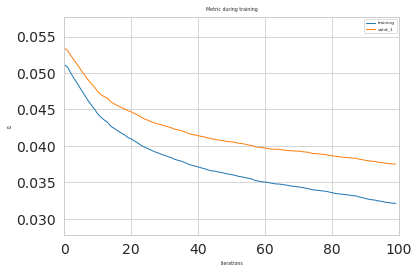

Plotting metrics== "AUC" recorded during training...


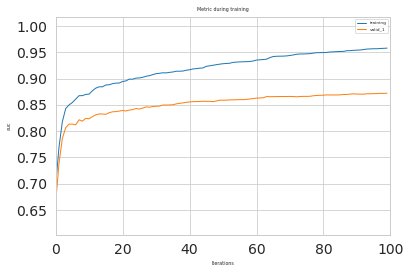

Plotting metrics=="LogLoss" recorded during training...


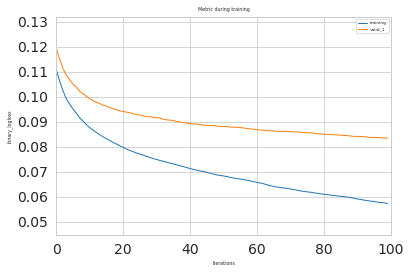

Plotting 54th tree...


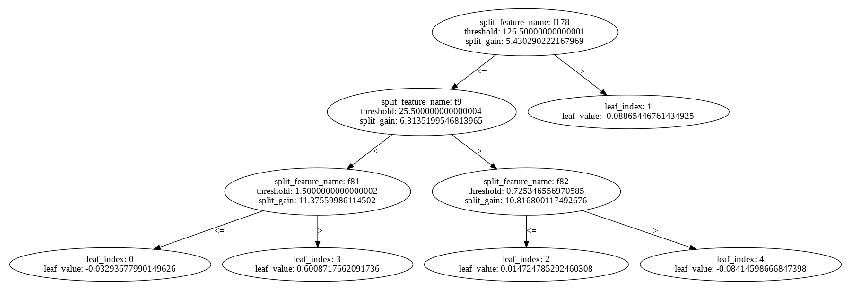

Plotting 54th tree with graphviz...


'Tree54.gv.pdf'

In [0]:
# create dataset for lightgbm
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train_mode_mean, y_train_mode_mean)
lgb_test = lgb.Dataset(X_test_mode_mean, y_test_mode_mean, reference=lgb_train)

# specify your configurations as a dict
params = {
    'objective' : "binary",
    'num_leaves': 5,
    'metric': ('binary_logloss','l1','auc'), #  'l2'
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train_mode_mean.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

print('Plotting metrics== "L1" recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()
print('Plotting metrics== "AUC" recorded during training...')
ax = lgb.plot_metric(evals_result, metric='auc')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()
print('Plotting metrics=="LogLoss" recorded during training...')
ax = lgb.plot_metric(evals_result, metric='binary_logloss')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()

#print('Plotting feature importances...')
#ax = lgb.plot_importance(gbm, max_num_features=10,figsize=(15, 15)) # les dix meilleurs varaibles explicatives :top features # measur the name of importance measure to plot, can be "Gain", "Cover" or "Frequency
#matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
#matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
#plt.show()


print('Plotting 54th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=53, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)

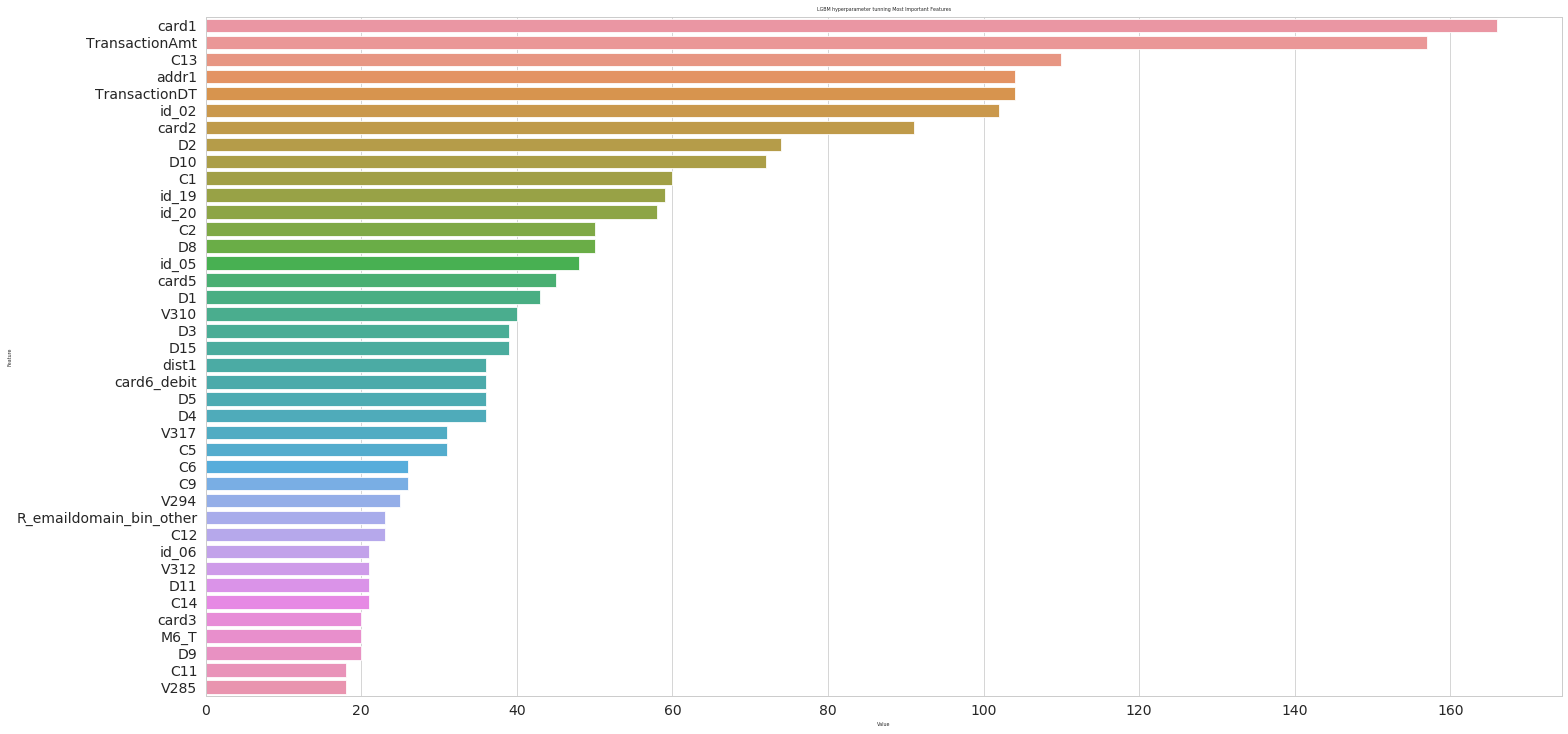

In [0]:
# autre methode d'affichage de feature importance 
cols = list(X_train_mode_mean.columns)
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[0:40]) # 40 top feature
plt.title('LGBM hyperparameter tunning Most Important Features')
plt.tight_layout()
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()

In [0]:
# affichage des tops 10 features
feature_imp.sort_values(by = 'Value', ascending = False)[:10]

,Value,Feature
468,166,card1
467,157,TransactionAmt
466,110,C13
465,104,addr1
464,104,TransactionDT
463,102,id_02
462,91,card2
461,74,D2
460,72,D10
459,60,C1


Starting training...


/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[10]	training's auc: 0.870923	training's l1: 0.0454785	training's binary_logloss: 0.089767	valid_1's auc: 0.818311	valid_1's l1: 0.0482993	valid_1's binary_logloss: 0.100969
[20]	training's auc: 0.886893	training's l1: 0.0416002	training's binary_logloss: 0.0814086	valid_1's auc: 0.826475	valid_1's l1: 0.0450786	valid_1's binary_logloss: 0.0958646
[30]	training's auc: 0.902557	training's l1: 0.0392673	training's binary_logloss: 0.0764436	valid_1's auc: 0.83173	valid_1's l1: 0.0431979	valid_1's binary_logloss: 0.0935444
[40]	training's auc: 0.915418	training's l1: 0.0377583	training's binary_logloss: 0.0722956	valid_1's auc: 0.834117	valid_1's l1: 0.0422175	valid_1's binary_logloss: 0.0924673
[50]	training's auc: 0.925396	training's l1: 0.0365217	training's binary_logloss: 0.0689129	valid_1's auc: 0.842551	valid_1's l1: 0.0412885	valid_1's binary_logloss: 0.0907653
[60]	training's auc: 0.93437	training's l1: 0.0354779	training's binary_logloss: 0.066127	valid_1's auc: 0.844225	valid_1's

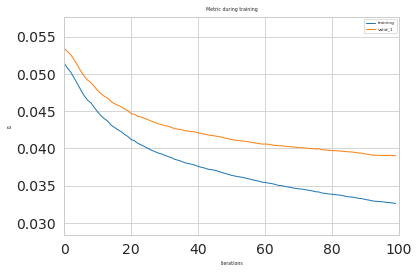

Plotting metrics == auc  recorded during training...


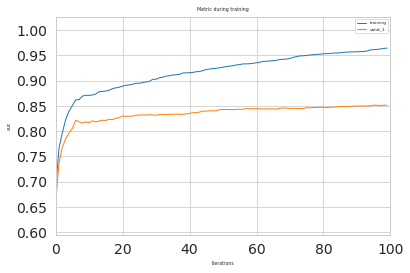

Plotting metrics== log-loss recorded during training...


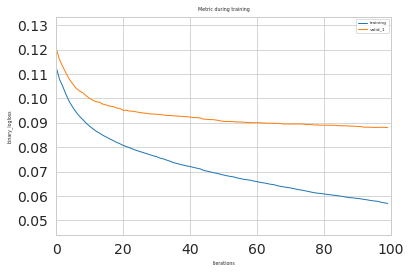

Plotting 54th tree...


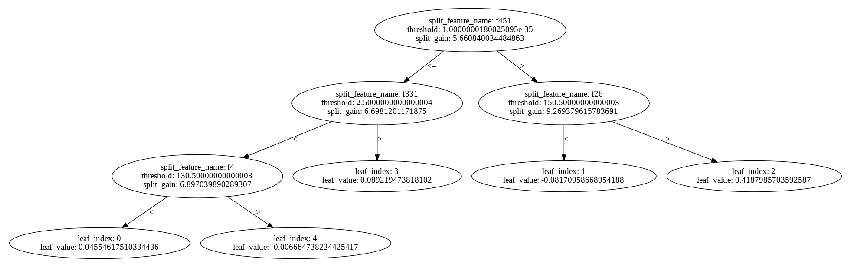

Plotting 54th tree with graphviz...


'Tree54.gv.pdf'

In [0]:
# create dataset for lightgbm
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train_knn, y_train_knn)
lgb_test = lgb.Dataset(X_test_knn, y_test_knn, reference=lgb_train)

# specify your configurations as a dict
params = {
    'objective' : "binary",
    'num_leaves': 5,
    'metric': ('binary_logloss','l1','auc'), #  'l2'
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train_mode_mean.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

print('Plotting metrics== l1 recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()
print('Plotting metrics == auc  recorded during training...')
ax = lgb.plot_metric(evals_result, metric='auc')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()
print('Plotting metrics== log-loss recorded during training...')
ax = lgb.plot_metric(evals_result, metric='binary_logloss')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()

#print('Plotting feature importances...')
#ax = lgb.plot_importance(gbm, max_num_features=10,figsize=(15, 15)) # les dix meilleurs varaibles explicatives :top features # measur the name of importance measure to plot, can be "Gain", "Cover" or "Frequency
#matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
#matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
#plt.show()


print('Plotting 54th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=53, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)

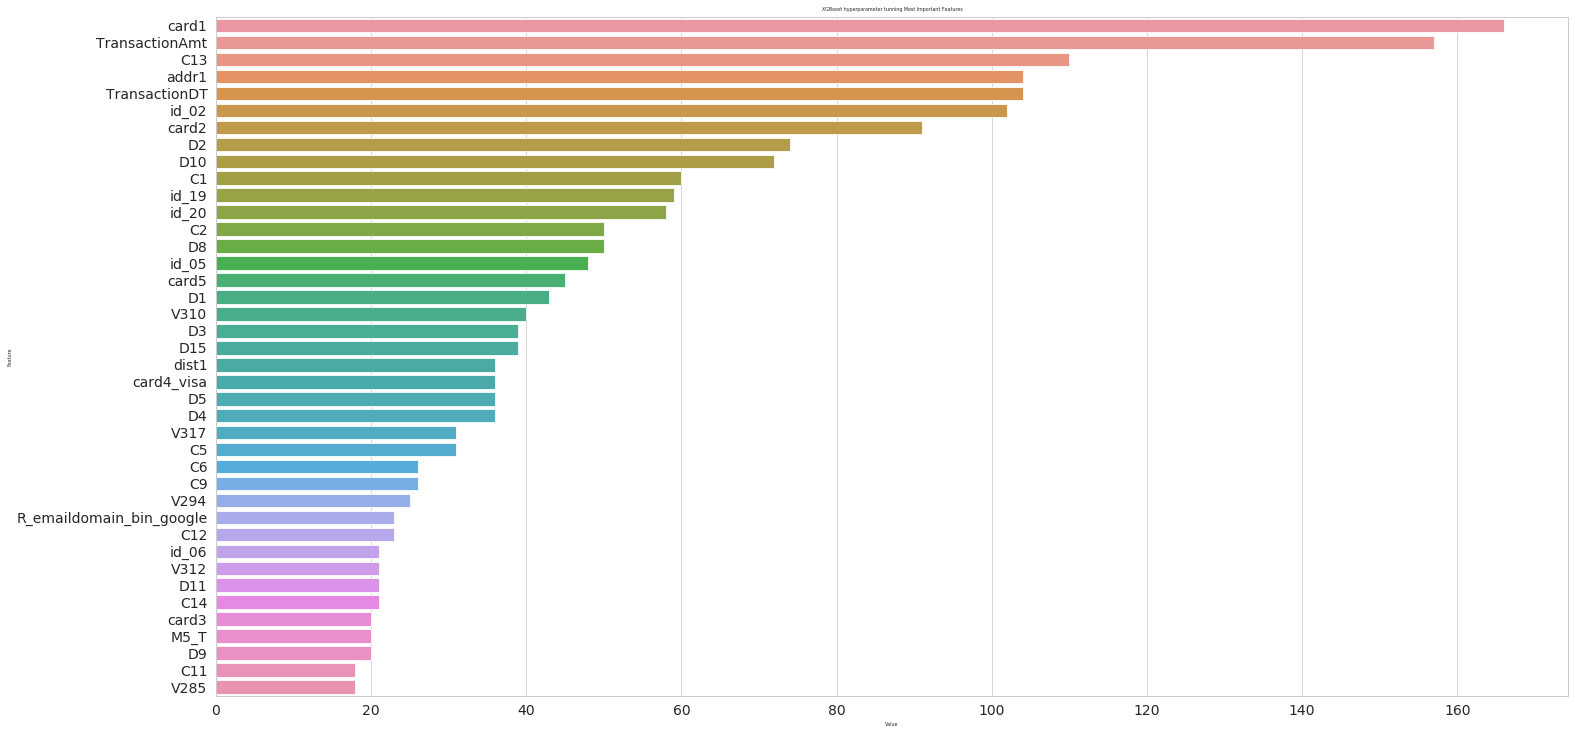

In [0]:
# autre methode d'affichage de feature importance 
cols = list(X_train_knn.columns)
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,cols)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[0:40]) # 40 top feature
plt.title('XGBoost hyperparameter tunning Most Important Features')
plt.tight_layout()
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()

In [0]:
# affichage des tops 10 features

feature_imp.sort_values(by = 'Value', ascending = False)[:10]

,Value,Feature
468,166,card1
467,157,TransactionAmt
466,110,C13
465,104,addr1
464,104,TransactionDT
463,102,id_02
462,91,card2
461,74,D2
460,72,D10
459,60,C1


 LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV or Baysian Optimizer 

In [0]:
# pour base mean_mode 
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV


In [0]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 40) # hyper parametre initialisation 


param_grid = {  
    'n_estimators': [x for x in range(24,200,20)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2],
    'num_leaves': [x for x in range(2,50,5)]
     } #hyper  parametre a minimiser  
     
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train_mode_mean, y_train_mode_mean,
        eval_set = [(X_test_mode_mean, y_test_mode_mean)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
[6]	valid_0's l1: 0.0456737	valid_0's binary_logloss: 0.0976339	valid_0's auc: 0.834831
[7]	valid_0's l1: 0.0446138	valid_0's binary_logloss: 0.0961578	valid_0's auc: 0.844552
[8]	valid_0's l1: 0.0434253	valid_0's binary_logloss: 0.0939356	valid_0's auc: 0.853812
[9]	valid_0's l1: 0.0426721	valid_0's binary_logloss: 0.0926187	valid_0's auc: 0.862081
[10]	valid_0's l1: 0.0420435	valid_0's binary_logloss: 0.0921764	valid_0's auc: 0.862628
[11]	valid_0's l1: 0.0414758	valid_0's binary_logloss: 0.0913439	valid_0's auc: 0.867941
[12]	valid_0's l1: 0.0410291	valid_0's binary_logloss: 0.0906682	valid_0's auc: 0.867434
[13]	valid_0's l1: 0.0407822	valid_0's binary_logloss: 0.090976	valid_0's auc: 0.866955
[14]	valid_0's l1: 0.0405949	valid_0's binary_logloss: 0.0910381	valid_0's auc: 0.865571
[15]	valid_0's l1: 0.0402576	valid_0's binary_logloss: 0.0902189	valid_0's auc: 0.869647
[16]	valid_0's l1: 0.0399592	valid_0'

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.125, max_depth=-1,
                                      metric='l1', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=20,
                                      n_jobs=-1, num_leaves=40, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2],
   

In [0]:
print('Best parameters found by grid search are:', gridsearch.best_params_)


Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 44, 'num_leaves': 47}


LightGBM Hyperparameters + early stopping


In [0]:


gbm = lgb.LGBMClassifier(learning_rate = gridsearch.best_params_['learning_rate'], metric = 'l1', 
                        n_estimators = gridsearch.best_params_['n_estimators'],num_leaves= gridsearch.best_params_['num_leaves'])

gbm.fit(X_train_mode_mean, y_train_mode_mean,
        eval_set = [(X_test_mode_mean, y_test_mode_mean)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.0526704	valid_0's binary_logloss: 0.108068	valid_0's auc: 0.738405
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.051137	valid_0's binary_logloss: 0.103336	valid_0's auc: 0.791134
[3]	valid_0's l1: 0.0497249	valid_0's binary_logloss: 0.100301	valid_0's auc: 0.806125
[4]	valid_0's l1: 0.0481906	valid_0's binary_logloss: 0.0972353	valid_0's auc: 0.816732
[5]	valid_0's l1: 0.0467465	valid_0's binary_logloss: 0.0945444	valid_0's auc: 0.824534
[6]	valid_0's l1: 0.0453156	valid_0's binary_logloss: 0.0922972	valid_0's auc: 0.838911
[7]	valid_0's l1: 0.0440348	valid_0's binary_logloss: 0.0902956	valid_0's auc: 0.848238
[8]	valid_0's l1: 0.0431172	valid_0's binary_logloss: 0.0890376	valid_0's auc: 0.853991
[9]	valid_0's l1: 0.0420561	valid_0's binary_logloss: 0.0877896	valid_0's auc: 0.853833
[10]	valid_0's l1: 0.0411936	valid_0's binary_logloss: 0.0868296	valid_0's auc: 0.856417
[11]	valid_0's l1: 0.0403731	valid_0's binary_logloss: 0.08578

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=44, n_jobs=-1, num_leaves=47,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

Feature Importances Graph


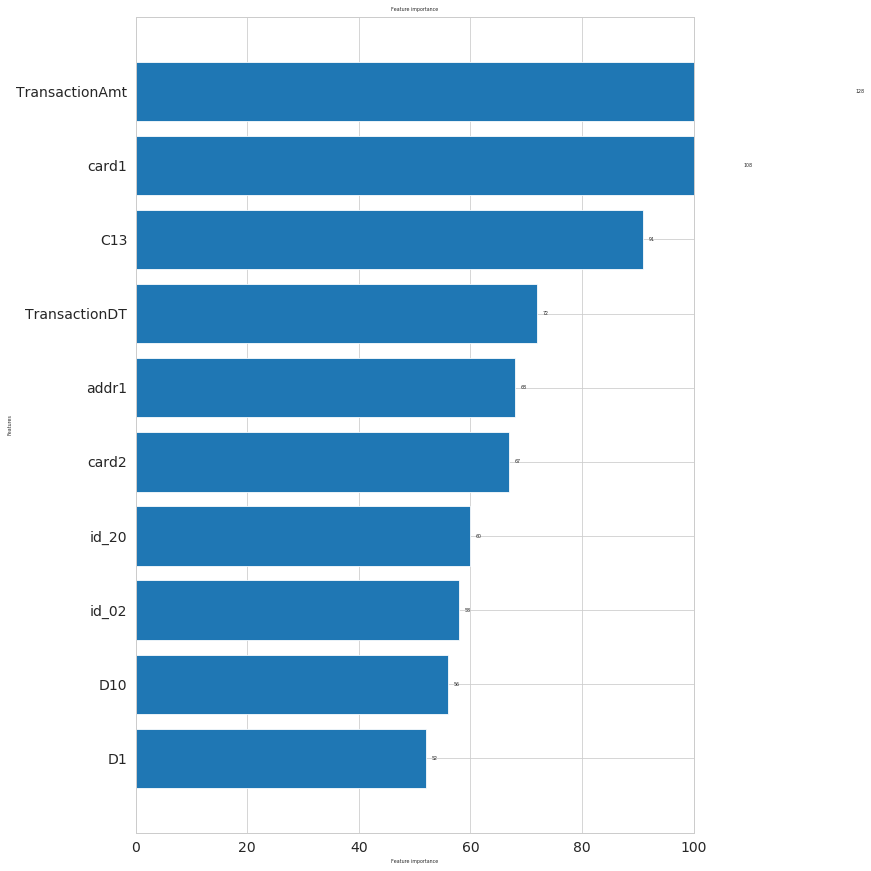

In [0]:
ax = lgb.plot_importance(gbm, height = 0.8, 
                         max_num_features = 10, 
                         xlim = (0,100), 
                         figsize = (10,15)) # , ylim = (0,23)
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()

In [0]:
#features importances : 10  tops 
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,cols)), columns=['Value','Feature'])

feature_imp.sort_values(by = 'Value', ascending = False)[:10]

,Value,Feature
468,128,TransactionAmt
467,108,card1
466,91,C13
465,72,TransactionDT
464,68,addr1
463,67,card2
462,60,id_20
461,58,id_02
460,56,D10
459,52,D1


Courbe de ROC

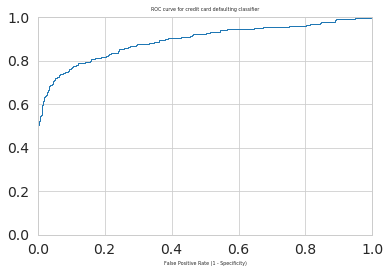

In [0]:
y_pred_prob =  gbm.predict_proba(X_test_mode_mean, num_iteration=gbm.best_iteration_) # la probabilité d"etre fraudeur 
y_pred_prob=y_pred_prob[:,1] # array en python comme les data frame en R
fpr, tpr, thresholds = roc_curve(y_test_mode_mean, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

Measures de Performance

In [0]:
y_pred = gbm.predict(X_test_mode_mean, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test_mode_mean, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test_mode_mean, y_pred))
print('The null acccuracy is:', max(y_test_mode_mean.mean(), 1 - y_test_mode_mean.mean()))

The accuracy of prediction is: 0.9819696969696969
The roc_auc_score of prediction is: 0.7048159490782441
The null acccuracy is: 0.9704545454545455


Submission 

In [0]:
proba = gbm.predict_proba(Test_mode_mean) # la probabilité d"etre fraudeur 
submission['isFraud'] = proba[:,1] # data frame transaction et proba d'appartenance dans le premiere classe
submission.head()

,isFraud
TransactionID,
3663550,0.006805
3663551,0.016309
3663552,0.001139
3663553,0.001224
3663554,0.004225


# Modele ML sur la base imputé par KNN

In [0]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 40) # hyper parametre initialisation 


param_grid = {  
    'n_estimators': [x for x in range(24,200,20)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2],
    'num_leaves': [x for x in range(2,50,5)]
     } #hyper  parametre a minimiser 
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train_knn, y_train_knn,
        eval_set = [(X_test_knn, y_test_knn)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Early stopping, best iteration is:
[10]	valid_0's l1: 0.0399061	valid_0's binary_logloss: 0.0928038	valid_0's auc: 0.849146
[1]	valid_0's l1: 0.0513897	valid_0's binary_logloss: 0.103385	valid_0's auc: 0.754625
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.0497312	valid_0's binary_logloss: 0.0998668	valid_0's auc: 0.824159
[3]	valid_0's l1: 0.0479814	valid_0's binary_logloss: 0.097108	valid_0's auc: 0.846478
[4]	valid_0's l1: 0.0461768	valid_0's binary_logloss: 0.0954771	valid_0's auc: 0.841441
[5]	valid_0's l1: 0.0449331	valid_0's binary_logloss: 0.0954083	valid_0's auc: 0.837414
[6]	valid_0's l1: 0.0439706	valid_0's binary_logloss: 0.0948758	valid_0's auc: 0.837949
[7]	valid_0's l1: 0.042973	valid_0's binary_logloss: 0.0940262	valid_0's auc: 0.839322
[8]	valid_0's l1: 0.0421045	valid_0's binary_logloss: 0.0936437	valid_0's auc: 0.840545
Early stopping, best iteration is:
[

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.125, max_depth=-1,
                                      metric='l1', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=20,
                                      n_jobs=-1, num_leaves=40, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2],
   

LGBM hyperparametre +early stopping

In [0]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 44, 'num_leaves': 42}


In [0]:

gbm = lgb.LGBMClassifier(learning_rate = gridsearch.best_params_['learning_rate'], metric = 'l1', 
                        n_estimators = gridsearch.best_params_['n_estimators'],num_leaves= gridsearch.best_params_['num_leaves'])


gbm.fit(X_train_knn, y_train_knn,
        eval_set = [(X_test_knn, y_test_knn)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.0528766	valid_0's binary_logloss: 0.109945	valid_0's auc: 0.753376
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.0513749	valid_0's binary_logloss: 0.105034	valid_0's auc: 0.80285
[3]	valid_0's l1: 0.0501004	valid_0's binary_logloss: 0.101849	valid_0's auc: 0.828228
[4]	valid_0's l1: 0.048638	valid_0's binary_logloss: 0.0991836	valid_0's auc: 0.832845
[5]	valid_0's l1: 0.0473879	valid_0's binary_logloss: 0.0969367	valid_0's auc: 0.835663
[6]	valid_0's l1: 0.0460701	valid_0's binary_logloss: 0.0946332	valid_0's auc: 0.848689
[7]	valid_0's l1: 0.0451233	valid_0's binary_logloss: 0.0929872	valid_0's auc: 0.851835
[8]	valid_0's l1: 0.0440445	valid_0's binary_logloss: 0.0913597	valid_0's auc: 0.851281
[9]	valid_0's l1: 0.043243	valid_0's binary_logloss: 0.0901502	valid_0's auc: 0.860601
[10]	valid_0's l1: 0.0422096	valid_0's binary_logloss: 0.0889493	valid_0's auc: 0.859281
[11]	valid_0's l1: 0.0413946	valid_0's binary_logloss: 0.0881526

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=44, n_jobs=-1, num_leaves=42,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

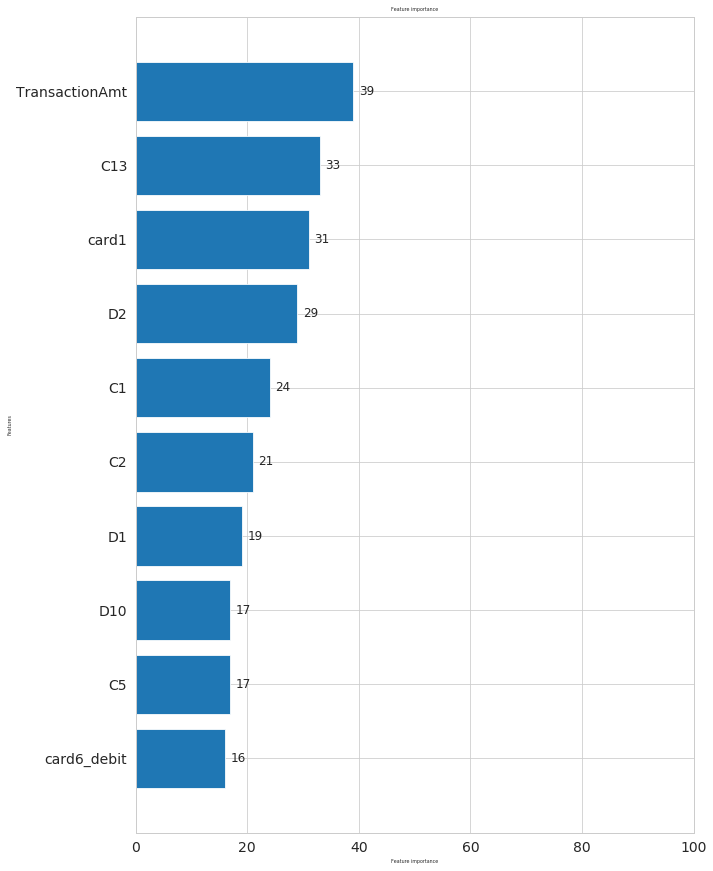

In [0]:
ax = lgb.plot_importance(gbm, height = 0.8, 
                         max_num_features = 10, 
                         xlim = (0,100), 
                         figsize = (10,15)) #, ylim = (0,23)
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.show()

In [0]:
#features importances : 10  tops 
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,cols)), columns=['Value','Feature'])

feature_imp.sort_values(by = 'Value', ascending = False)[:10]

,Value,Feature
468,39,TransactionAmt
467,33,C13
466,31,card1
465,29,D2
464,24,C1
463,21,C2
462,19,D1
461,17,D10
460,17,C5
459,16,card6_debit


In [0]:
y_pred = gbm.predict(X_test_knn, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test_knn, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test_knn, y_pred))
print('The null acccuracy is:', max(y_test_knn.mean(), 1 - y_test_knn.mean()))

The accuracy of prediction is: 0.9787878787878788
The roc_auc_score of prediction is: 0.6534558337837026
The null acccuracy is: 0.9704545454545455


La courbe de ROC: curve Roc

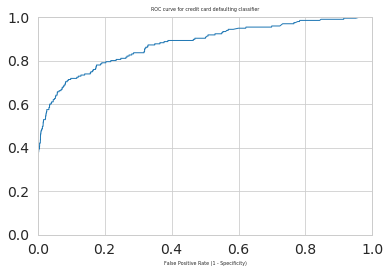

In [0]:
y_pred_prob =  gbm.predict_proba(X_test_knn, num_iteration=gbm.best_iteration_) # la probabilité d"etre fraudeur 
y_pred_prob=y_pred_prob[:,1] # array en python comme les data frame en R
fpr, tpr, thresholds = roc_curve(y_test_knn, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
plt.grid(True)

Submission

In [0]:
y_pred_prob = gbm.predict_proba(Test_knn) # la probabilité d"etre fraudeur 
submission['isFraud'] = y_pred_prob[:,1] # data frame transaction et proba d'appartenance dans le premiere classe
submission.head()

,isFraud
TransactionID,
3663550,0.058832
3663551,0.027311
3663552,0.007207
3663553,0.007222
3663554,0.043287


###  Modele de LGBM WITH CROSS VALIDATION (KFold or Stratified KFold) appliquer sur LGBM d'hyper-para dèja optimisés ( sur la base iputée pas knn)

In [0]:
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
import gc

In [0]:
kf = KFold(n_splits=3) # construction de 3 modele de LGBM et chacun entre eux s'entraine sur une partie de la base de donnée 
# donc il faut conaténer les bases de données 
features=pd.concat([X_train_knn,X_test_knn], ignore_index=True) # data totale
target = pd.concat([y_train_knn,y_test_knn], ignore_index=True) # data totale   #y_train_knn
nround = 5
models = []
for train_index,test_index in kf.split(features):
    train_features = features.loc[train_index]
    train_target = target.loc[train_index]
    
    test_features = features.loc[test_index]
    test_target = target.loc[test_index]
    
    d_training = lgb.Dataset(train_features, label=train_target, free_raw_data=False) #,categorical_feature=categorical_features
    d_test = lgb.Dataset(test_features, label=test_target, free_raw_data=False)#,categorical_feature=categorical_features
    #LGBM Paramater tuning
    param = {
        'num_leaves': gbm.num_leaves,
        'learning_rate': gbm.learning_rate,
        'n_estimators' :gbm.n_estimators,
        'max_depth': 17,
        'colsample_bytree':.8,
        'subsample':.9,
        'max_depth':15,
        'reg_alpha':.1,
        'reg_lambda':.1,
        'min_split_gain':.01,
        'min_child_weight':2,
        'objective': 'binary',
        'metric': 'auc',
    } #  'boosting_type': 'gbdt',
 

    model = lgb.train(params, train_set=d_training, num_boost_round=nround, valid_sets=[d_training,d_test], verbose_eval=25, early_stopping_rounds=50)
    models.append(model)
    del train_features, train_target, test_features, test_target, d_training, d_test
    gc.collect()

Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[5]	training's auc: 0.833472	training's l1: 0.0518176	training's binary_logloss: 0.105058	valid_1's auc: 0.837309	valid_1's l1: 0.0497068	valid_1's binary_logloss: 0.0997089
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[5]	training's auc: 0.834848	training's l1: 0.0494324	training's binary_logloss: 0.0999754	valid_1's auc: 0.826461	valid_1's l1: 0.0508688	valid_1's binary_logloss: 0.107235
Training until validation scores don't improve for 50 rounds.
Did not meet early stopping. Best iteration is:
[5]	training's auc: 0.848729	training's l1: 0.0485013	training's binary_logloss: 0.0985404	valid_1's auc: 0.822485	valid_1's l1: 0.0509392	valid_1's binary_logloss: 0.106897


Important Features¶


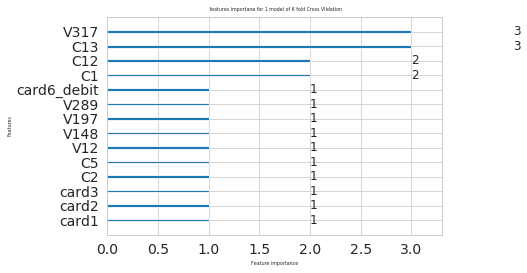

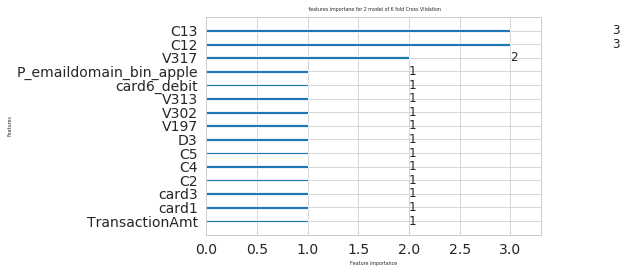

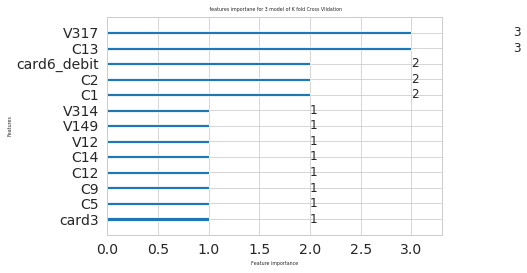

In [0]:
i=1
for model in models:
    lgb.plot_importance(model,title=" features importane for "+ str(i)+ " model of K fold Cross Vlidation")
    matplotlib.pyplot.xticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
    matplotlib.pyplot.yticks(fontsize=14) # Pour modifier (cad augmenter ou diminuer) la taille des étiquettes sur les axes d'une figure
    i+=1
    plt.show()

Prediction

In [0]:
# prédiction al proba d'aoppartenance = la moyenne des proba des model ou la moyenne de proba pondéré des models( non la classe d'appartennace par vote majoritaire et non par maximum a posterieuré et non par vote pondéré)
#results = []
def pred(models, X,results= []):
  
  for model in models:
    if  results == []:
        results = (model.predict(X, num_iteration=model.best_iteration)) / len(models) # pour la régression np.expm1(model.predict(X, num_iteration=model.best_iteration)) / len(models)
    else:
        results +=(model.predict(X, num_iteration=model.best_iteration)) / len(models) # # pour la régression np.expm1(model.predict(X, num_iteration=model.best_iteration)) / len(models)
    del model
  gc.collect()
  return results


In [0]:
pred(models, Test_knn)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


array([0.0251582 , 0.03771903, 0.02244077, ..., 0.02244077, 0.02388775,
       0.0393599 ])

In [0]:
# fonction de prédiction 
#convert into binary values
def pred_class(models,base):
  y_pred= pred(models, base)
  for i in range(0,len(y_pred)):
     if (y_pred[i] >= 0.5):
       y_pred[i] = 1
     else:
         y_pred[i] =0
  return y_pred

performance

In [0]:
y_pred = pred_class(models,X_test_knn)
print('\n\n The accuracy of prediction is:', accuracy_score(y_test_knn, y_pred))
print('\n\n The null acccuracy is:', max(y_test_knn.mean(), 1 - y_test_knn.mean()))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.




 The accuracy of prediction is: 0.9748484848484849


 The null acccuracy is: 0.9704545454545455


Submission

In [0]:
results=pred(models, Test_knn,results=[]) # results
y_pred_prob = results # la probabilité d"etre fraudeur 
submission['isFraud'] = ((y_pred_prob)) # data frame transaction et proba d'appartenance dans le premiere classe
submission.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


,isFraud
TransactionID,
3663550,0.025158
3663551,0.037719
3663552,0.022441
3663553,0.022441
3663554,0.056901


*LGBM CROSS VALIDATION PROGRAMMER MANUELLEMENT *

In [0]:
# maintenat on va implémenté l'ancien modéle usuelement ( usuel returne resultat par vote et proba moyenne , l'ancien ne returne par resultats par vote)
# Modeling
data= pd.concat([X_train_knn,X_test_knn], ignore_index=True) # data totale 
y=pd.concat([y_train_knn,y_test_knn], ignore_index=True)   # de data 
def LGBM_cross(data,test,proba_classe=0): # proba_classe= c ad vous désirez quoi comme returne probabilité préite ou la calsse d'apparetanance prédite, test= base_a_predire
   features = [f_ for f_ in data.columns if f_ in test]

   folds = KFold(n_splits=3, shuffle=True, random_state=123)
   oof_preds = np.zeros(data.shape[0])
   sub_preds = np.zeros(test.shape[0])
   for n_fold, (trn_idx, val_idx) in enumerate(folds.split(data)):
      trn_x, trn_y = data[features].iloc[trn_idx], y.iloc[trn_idx]
      val_x, val_y = data[features].iloc[val_idx], y.iloc[val_idx]
      

      clf = LGBMClassifier(
        n_estimators=gbm.n_estimators,
        learning_rate=gbm.learning_rate,
        num_leaves=gbm.num_leaves,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=15,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
        )
    
      clf.fit(trn_x, trn_y, 
            eval_set= [(trn_x, trn_y), (val_x, val_y)], 
            eval_metric='auc', verbose=250, early_stopping_rounds=150
           )
    
      oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
      if proba_classe== 1: # return proba
        sub_preds += clf.predict_proba(test[features], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        #sub_preds_proba += clf.predict_proba(test[features], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
      else: 
        sub_preds += clf.predict(test[features], num_iteration=clf.best_iteration_)
      print('\n \n Fold %2d AUC : %.6f\n \n ' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
      del clf, trn_x, trn_y, val_x, val_y
      gc.collect()
   if  proba_classe== 0  : # regle de décision par vote 
     sub_preds[sub_preds==2]=1
     sub_preds[sub_preds==3]=1
     sub_preds[sub_preds==1]=0
     sub_preds[sub_preds==0]=0
   print('\n \n the auc total of prediction is Full AUC score %.6f\n \n ' % roc_auc_score(y, oof_preds))   

   return sub_preds

In [0]:
LGBM_cross(data,Test_mode_mean,0)

Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0216521	training's auc: 0.999889	valid_1's binary_logloss: 0.0676156	valid_1's auc: 0.895763

 
 Fold  1 AUC : 0.895763
 
 
Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0201816	training's auc: 0.999923	valid_1's binary_logloss: 0.0748403	valid_1's auc: 0.870028

 
 Fold  2 AUC : 0.870028
 
 
Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0180055	training's auc: 0.999945	valid_1's binary_logloss: 0.0864225	valid_1's auc: 0.890913

 
 Fold  3 AUC : 0.890913
 
 

 
 Full AUC score 0.884621
 
 


array([0., 0., 0., ..., 0., 0., 0.])

In [0]:

y_pred = LGBM_cross(data,X_test_knn,0)
print('The accuracy of prediction is:', accuracy_score(y_test_knn, y_pred))
print('\n\nThe null acccuracy is:', max(y_test_knn.mean(), 1 - y_test_knn.mean()))

Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0219363	training's auc: 0.999813	valid_1's binary_logloss: 0.067591	valid_1's auc: 0.897195

 
 Fold  1 AUC : 0.897195
 
 
Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0205773	training's auc: 0.999882	valid_1's binary_logloss: 0.0748337	valid_1's auc: 0.871777

 
 Fold  2 AUC : 0.871777
 
 
Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.018464	training's auc: 0.999975	valid_1's binary_logloss: 0.0852378	valid_1's auc: 0.895285

 
 Fold  3 AUC : 0.895285
 
 

 
 the auc total of prediction is Full AUC score 0.887603
 
 
The accuracy of prediction is: 0.9704545454545455


The null acccuracy is: 0.9704545454545455


Submission 

In [0]:

results=LGBM_cross(data,Test_knn,1) # results
y_pred_prob = np.array(results) # la probabilité d"etre fraudeur 
submission['isFraud'] = ((y_pred_prob)) # data frame transaction et proba d'appartenance dans le premiere classe
submission.head()

Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0216521	training's auc: 0.999889	valid_1's binary_logloss: 0.0676156	valid_1's auc: 0.895763

 
 Fold  1 AUC : 0.895763
 
 
Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0201816	training's auc: 0.999923	valid_1's binary_logloss: 0.0748403	valid_1's auc: 0.870028

 
 Fold  2 AUC : 0.870028
 
 
Training until validation scores don't improve for 150 rounds.
Did not meet early stopping. Best iteration is:
[44]	training's binary_logloss: 0.0180055	training's auc: 0.999945	valid_1's binary_logloss: 0.0864225	valid_1's auc: 0.890913

 
 Fold  3 AUC : 0.890913
 
 

 
 the auc total of prediction is Full AUC score 0.884621
 
 


,isFraud
TransactionID,
3663550,0.008550
3663551,0.018933
3663552,0.003026
3663553,0.002210
3663554,0.003978
